### 【問題1】自作データセットでの分類の学習 
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as sp

import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

In [10]:
path = r"C:\Users\anai\dive\Dataset\Sprint18\KADAI_1\Train/"
x_list = os.listdir(path)
X_train = x_list[0:8]
X_test = x_list[8:10]
display(X_train)
display(X_test)
display(path)

['0001 (2).jpg',
 '0001.jpg',
 '0002 (2).jpg',
 '0002.jpg',
 '0003 (2).jpg',
 '0003.jpg',
 '0004 (2).jpg',
 '0004.jpg']

['0005 (2).jpg', '0005.jpg']

'C:\\Users\\anai\\dive\\Dataset\\Sprint18\\KADAI_1\\Train/'

In [11]:
x_img_array = np.empty((0,224,224,3))

for img in x_list:    
    # ファイル名に'dog'が含まれるイメージ
    #if re.search('dog', img):
    path_name = path+img
    x_img = Image.open(path_name)
        
    # サイズを揃える
    x_img = x_img.resize((224, 224))
    
    # PIL.Image.Imageからnumpy配列へ
    x_img = np.array(x_img)
        
    # 正規化
    x_img = x_img / 255.0
        
    # axisの追加
    x_img = x_img.reshape((1,224,224,3))
    x_img_array = np.concatenate([x_img_array, x_img], axis = 0)

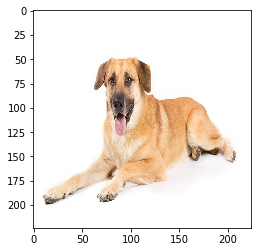

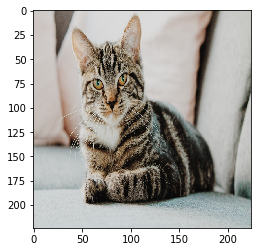

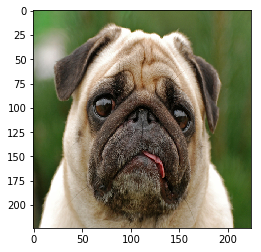

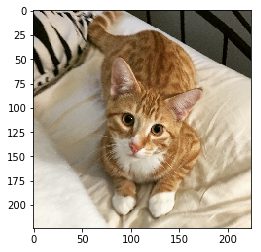

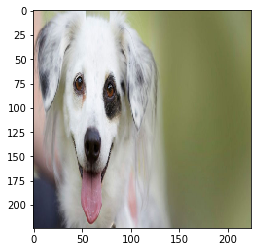

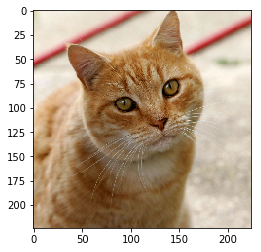

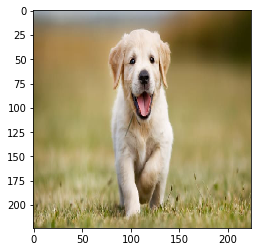

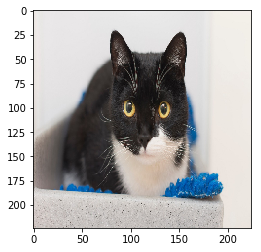

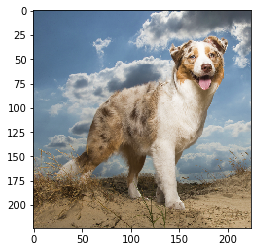

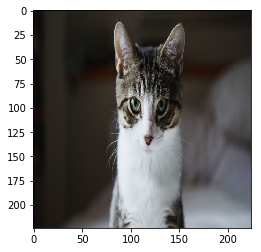

In [12]:
for i in range(len(x_img_array)):
    plt.imshow(x_img_array[i])
    plt.show()

In [13]:
x_img_array.shape

(10, 224, 224, 3)

In [14]:
X_train = x_img_array[0:6,:,:,:]
X_val = x_img_array[6:8,:,:,:]
X_test = x_img_array[8:10,:,:,:]
display(X_train.shape)
display(X_val.shape)
display(X_test.shape)

(6, 224, 224, 3)

(2, 224, 224, 3)

(2, 224, 224, 3)

In [15]:
y_train = ["dog", "cat", "dog", "cat", "dog", "cat"]
y_val = ["dog", "cat"]
y_test = ["dog", "cat"]

In [8]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D

from keras.layers.core import Dense, Activation, Dropout, Flatten
from sklearn.preprocessing import LabelEncoder


Using TensorFlow backend.


In [9]:
"""
TensorFlowで実装したニューラルネットワークを使いMNISTデータセットを3値分類する
"""


# 画像データを2次元に変換
display(X_train.shape)


#encoding
le = LabelEncoder()
#enc = Oneenc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)

# trainとtestに分割
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)


# ハイパーパラメータの設定
learning_rate = 0.05
batch_size = 1
num_epochs = 10

n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1


# モデルの定義
model = Sequential()

model.add(Conv2D(32,(3,3), padding='same', input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 112x112
model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 56x56
model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 28x28
model.add(Flatten())
model.add(Dense(512))

model.add(Dense(n_classes, activation='sigmoid'))

adam = Adam(lr=0.01)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=["accuracy"])

model.summary()


(6, 224, 224, 3)

W0919 16:21:56.720834  2872 deprecation_wrapper.py:119] From C:\Users\anai\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 16:21:56.746764  2872 deprecation_wrapper.py:119] From C:\Users\anai\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 16:21:56.750753  2872 deprecation_wrapper.py:119] From C:\Users\anai\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0919 16:21:56.770733  2872 deprecation_wrapper.py:119] From C:\Users\anai\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0919 16:21:56.876418  2872 deprecation_wrapper.py:119] From C:\Users\anai\Anaconda

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       73856     
__________

In [10]:
batch_size = 1
nb_epoch = 10

history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=nb_epoch, 
                    verbose=2,
                    validation_data=(X_val, y_val))

W0919 16:21:57.114788  2872 deprecation_wrapper.py:119] From C:\Users\anai\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 6 samples, validate on 2 samples
Epoch 1/10
 - 7s - loss: 8.1732 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 10/10
 - 4s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


### 【問題2】分類データセットに対するデータ拡張 
データ拡張（Data Augmentation）を行ってください。

In [16]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

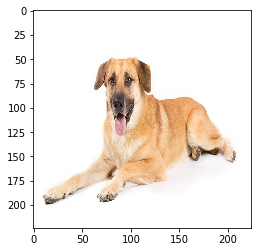

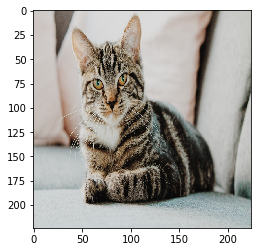

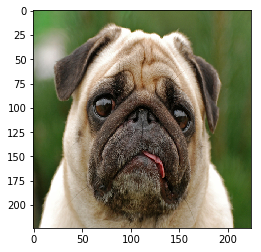

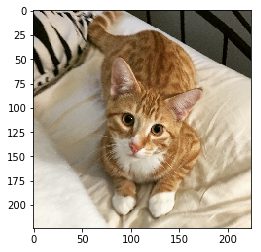

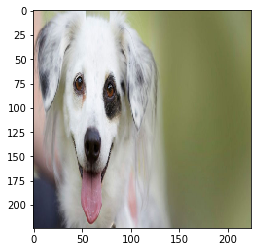

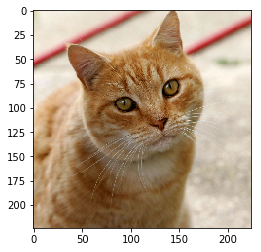

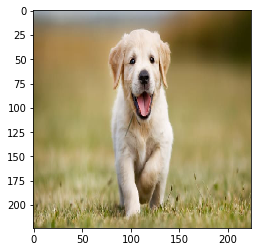

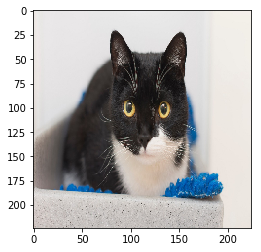

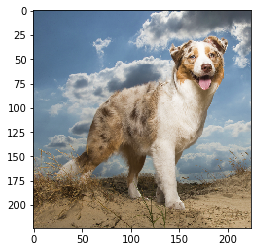

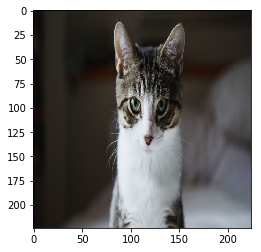

拡張後


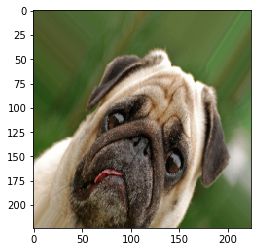

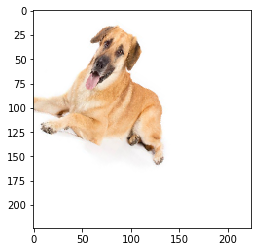

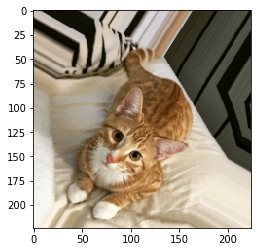

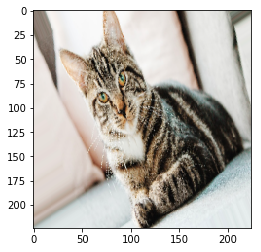

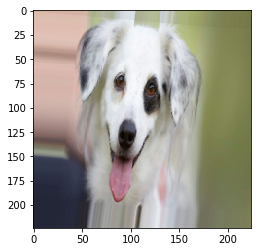

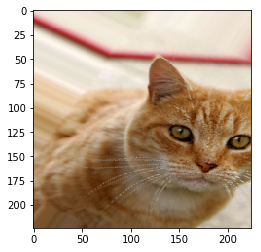

In [22]:
from keras.preprocessing.image import ImageDataGenerator,load_img, save_img, img_to_array, array_to_img

datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode="nearest")

# xは1サンプルのみなのでbatch_sizeは1で固定
g = datagen.flow(X_train, batch_size=1) 
for i in range(len(x_img_array)):
    plt.imshow(x_img_array[i])
    plt.show()
print("拡張後")
for i in range(X_train.shape[0]):
    batches = g.next()
    plt.figure(i)
    # ４次元から3次元データにし、配列から画像にする。
    gen_img = array_to_img(batches[0])
    plt.imshow(gen_img)
    gen_img.save(r"C:\Users\anai\dive\Dataset\Sprint18\KADAI_1\Augmentation/"+str(i)+"_"+str(i)+".jpg", quality=95)
    plt.show()
plt.show()

### 【問題3】物体検出データセットの用意 
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。
《アノテーションのためのツール》
アノテーションツールにはLabelImgなどがあります。

In [12]:
%cd "C:\Users\anai\dive\TEST_upload3\diveintocode-ml\LabelImg.git"

C:\Users\anai\dive\TEST_upload3\diveintocode-ml\LabelImg.git


In [10]:
!pyrcc5 -o libs / resources.py resources.qrc

C:\Users\anai\Anaconda3\lib\site-packages\PyQt5\pyrcc_main.py: File does not exist 'resources.py'


In [9]:
!python labelImg.py

Traceback (most recent call last):
  File "labelImg.py", line 29, in <module>
    from libs.resources import *
ModuleNotFoundError: No module named 'libs.resources'


In [11]:
!labelImg

'labelImg' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


### 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

LabelImgを用いてアノテーションを行なった

### 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。

In [24]:
import numpy as np
import glob
import re

from PIL import Image
import cv2

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras import backend as K

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from albumentations import (
    HorizontalFlip, ShiftScaleRotate,RandomRotate90, Blur,Compose,  RGBShift, VerticalFlip, BboxParams,)

from xml.etree import ElementTree

In [25]:
def get_ann_array(ann_list):
    """
    xmlからbboxのxmin, ymin, xmax, ymaxを取得する
    """
    cord_bbox = np.empty((0, 4))
    for ann in ann_list:
        tree = ElementTree.parse(ann)
        root = tree.getroot()
        data = root.find('object').find("bndbox")
        
        xmin = int(data.find("xmin").text)
        ymin = int(data.find("ymin").text)
        xmax = int(data.find("xmax").text)
        ymax = int(data.find("ymax").text)
        
        bbox_array = np.array([xmin, ymin, xmax, ymax]).reshape(1, 4)
        cord_bbox = np.concatenate([cord_bbox, bbox_array], axis=0)
    return cord_bbox

In [26]:
def img2array(img_list):
    """
    パスから画像のarrayを取得
    """
    array = np.empty((0, 224,224, 3))
    
    
    
    
    
    for img in img_list:
        image = cv2.imread(img)
        image = cv2.resize(image, (224,224))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.reshape(1, 224,224,3)
        
        array = np.concatenate([array, image], axis=0)
    return array

In [27]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='pascal_voc', min_area=min_area, min_visibility=min_visibility, label_fields=['category_id']))

In [28]:
def aug_object(image_data, ann_data):
    """
    画像データとbboxesの水増しを行う
    ---------------------------------------------
    input
    image_data: np.ndarray
    ann_data:np.ndarray
    ---------------------------------------------
    output
    result_data_array:np.ndarray
    result_ann_array:np.ndarray
    
    """
    #結果を入れる箱を用意
    result_data_array = np.empty((0, 224,224,3))
    result_ann_array = np.zeros((0, 4))
    


    for i in range(image_data.shape[0]):
        #変化させるクラスをインスタンス化
        hori = get_aug([HorizontalFlip(p=1)])
        var = get_aug([VerticalFlip(p=1)])
        shift= get_aug([RandomRotate90(p=1)])
        fli = get_aug([Blur(p=1)])
        
        #上から５つが猫なので、分類する
        if i <= 4:
            annotations = {'image':image_data[i] , 'bboxes': [ann_data[i]], 'category_id': [1]}
        else:
            annotations = {'image':image_data[i] , 'bboxes': [ann_data[i]], 'category_id': [0]}
            
        #それぞれ変化させる
        image_hori = hori(**annotations)
        image_var = var(**annotations)
        image_shift = shift(**annotations)
        image_fli = fli(**annotations)
        
        #変化させた画像をnp.arrayの形で取り出し、結果を入れる箱に合うようにrehape
        im = image_data[i].reshape(1, 224, 224, 3)
        im_hori = image_hori["image"].reshape(1, 224, 224, 3)
        im_var = image_var["image"].reshape(1, 224, 224, 3)
        im_shift = image_shift["image"].reshape(1, 224, 224, 3)
        im_fli = image_fli["image"].reshape(1, 224, 224, 3)
        
        #変化させたbboxを取り出し、結果を入れる箱に合うようにreshape
        an = ann_data[i].reshape(1, 4)
        an_hori = np.array(image_hori["bboxes"]).reshape(1, 4)
        an_var = np.array(image_var["bboxes"]).reshape(1, 4)
        an_shift = np.array(image_shift["bboxes"]).reshape(1, 4)
        an_fli = np.array(image_fli["bboxes"]).reshape(1, 4)
        
        result_data_array = np.concatenate([result_data_array, im, im_hori, im_var, im_shift, im_fli], axis=0)
        result_ann_array = np.concatenate([result_ann_array, an, an_hori, an_var, an_shift, an_fli], axis=0)
        
    
    return result_data_array, result_ann_array

In [29]:
def im_show(img_data, ann_data, num):
    """
    画像データにbboxを表示したものを返す
    """
    x_min, y_min, x_max, y_max = aug_ann[num].reshape(4,)
    show_img_box = cv2.rectangle(aug_img[num].astype(np.uint8), (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=(255,0,0), thickness = 2)
    return show_img_box

In [36]:
#アノテーションしたファイルのパス取得
p = r"C:\Users\anai\dive\Dataset\Sprint18\KADAI_1\Anotation/"
ann_list = glob.glob(p  + '/*' + ".xml")
ann_list

['C:\\Users\\anai\\dive\\Dataset\\Sprint18\\KADAI_1\\Anotation\\1_1.xml',
 'C:\\Users\\anai\\dive\\Dataset\\Sprint18\\KADAI_1\\Anotation\\2_2.xml']

In [37]:
#アノテーションした後のxmlからbboxの座標を取得
cord_bbox = get_ann_array(ann_list)
cord_bbox

array([[  4.,  14., 137., 159.],
       [ 33.,  39., 165., 218.]])

In [42]:
#path = r"C:\Users\anai\dive\Dataset\Sprint18\KADAI_1\PNG/"
#x_list = os.listdir(path)
#x_list

path = r"C:\Users\anai\dive\Dataset\Sprint18\KADAI_1\Augmentation/"
img_list = glob.glob(path + '/*' + ".jpg")
img_list

['C:\\Users\\anai\\dive\\Dataset\\Sprint18\\KADAI_1\\Augmentation\\1_1.jpg',
 'C:\\Users\\anai\\dive\\Dataset\\Sprint18\\KADAI_1\\Augmentation\\2_2.jpg']

In [43]:
#リストから画像のarrayを取得
#255で割っていない
X_data = img2array(img_list)

In [44]:
#データの水増し
aug_img, aug_ann = aug_object(X_data, cord_bbox)

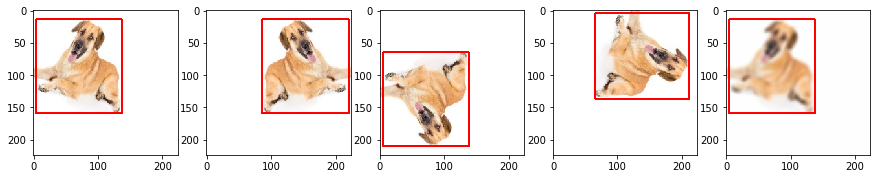

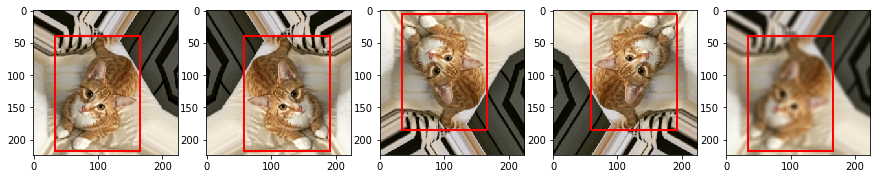

In [46]:
#確認
j = 0
for i in range(2):
    plt.figure(figsize=(15, 10))
    image = im_show(aug_img, aug_ann, i+j)
    plt.subplot(1, 5, 1)
    plt.imshow(image)
    
    image = im_show(aug_img, aug_ann, i+1+j)
    plt.subplot(1, 5, 2)
    plt.imshow(image)
    
    image = im_show(aug_img, aug_ann, i+2+j)
    plt.subplot(1, 5, 3)
    plt.imshow(image)
    
    image = im_show(aug_img, aug_ann, i+3+j)
    plt.subplot(1, 5, 4)
    plt.imshow(image)
    
    image = im_show(aug_img, aug_ann, i+4+j)
    plt.subplot(1, 5, 5)
    plt.imshow(image)
    
    j += 4
    
    plt.show()